In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import mean_squared_error, log_loss, r2_score, accuracy_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from GBDT.GradientBoostDecisionTree import GBDTClassifier
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
# Setup global plt style
plt.style.use('seaborn-paper')
#matplotlib.rcParams['axes.labelsize'] = 18
#matplotlib.rcParams['xtick.labelsize'] = 15
#matplotlib.rcParams['ytick.labelsize'] = 15
#matplotlib.rcParams['legend.fontsize'] = 'large'
#matplotlib.rcParams["legend.facecolor"] = 'white'

In [3]:
data = datasets.load_iris()
x = data.data
y = data.target
x, test_x, y, test_y = train_test_split(x, y, test_size=0.5, random_state=1)
x.shape

(75, 4)

## My GBDT

In [4]:
Gbdt = GBDTClassifier(100, 0.1, 'deviance', tree_params={'criterion': 'mse', 'max_depth': 3}, subsample=0.5)
Gbdt.fit(x, y)

GBDTClassifier(learning_rate=0.1, loss='deviance', n_estimators=100,
               random_state=None, subsample=0.5,
               tree_params={'criterion': 'mse', 'max_depth': 3})

In [5]:
accuracy_score(y, Gbdt.predict(x))

1.0

In [6]:
accuracy_score(test_y, Gbdt.predict(test_x))

0.9333333333333333

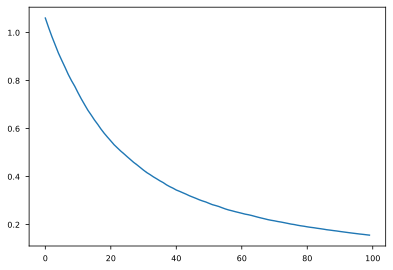

In [7]:
plt.plot(range(len(Gbdt.train_score_)), Gbdt.train_score_)

In [8]:
Gbdt.feature_importances_

array([0.06128615, 0.06967158, 0.49396848, 0.37507379])

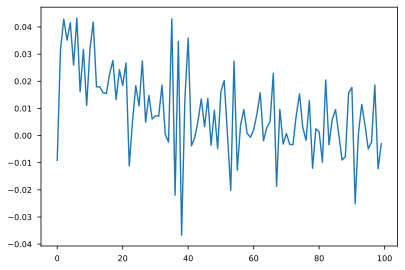

In [9]:
plt.plot(range(len(Gbdt.oob_improvement_)), Gbdt.oob_improvement_)

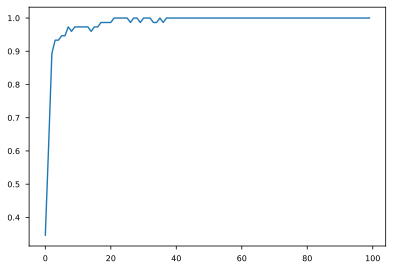

In [10]:
scores = [accuracy_score(y, pred) for pred in Gbdt.staged_predict(x)]
plt.plot(np.arange(len(scores)), scores)

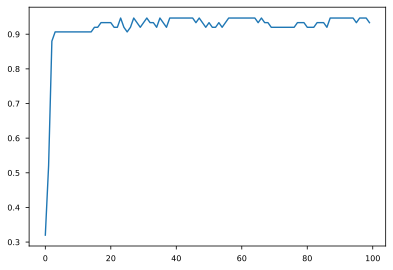

In [11]:
scores = [accuracy_score(test_y, pred) for pred in Gbdt.staged_predict(test_x)]
plt.plot(np.arange(len(scores)), scores)

In [12]:
log_proba = [p for p in Gbdt.staged_predict_log_proba(x)]
log_proba[0].shape

(75, 3)

In [13]:
Gbdt.get_params()

{'learning_rate': 0.1,
 'loss': 'deviance',
 'n_estimators': 100,
 'random_state': None,
 'subsample': 0.5,
 'tree_params': {'criterion': 'mse', 'max_depth': 3}}

In [14]:
from sklearn.utils.estimator_checks import check_estimator
#check_estimator(GBDTClassifier)

 ## Sklearn GBDT

In [15]:
gbr = GradientBoostingClassifier(criterion='mse', loss='deviance', n_estimators=100, learning_rate=0.1, max_depth=3, subsample=0.5)
gbr.fit(x, y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.5, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [16]:
accuracy_score(y, gbr.predict(x))

1.0

In [17]:
accuracy_score(test_y, gbr.predict(test_x))

0.92

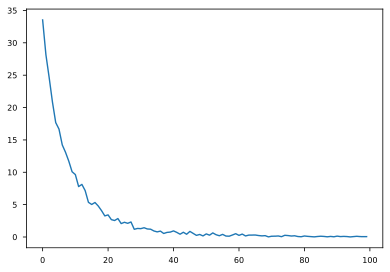

In [18]:
plt.plot(range(len(gbr.train_score_)), gbr.train_score_)

In [19]:
gbr.feature_importances_

array([0.0627424 , 0.07654177, 0.54947245, 0.31124338])

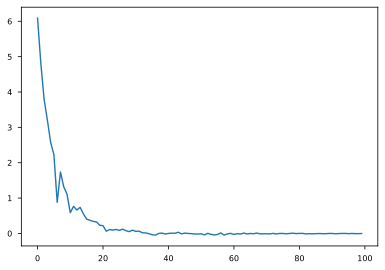

In [20]:
plt.plot(range(len(gbr.oob_improvement_)), gbr.oob_improvement_)

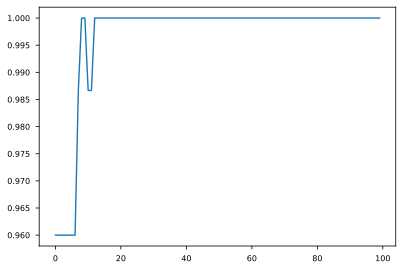

In [21]:
scores = [accuracy_score(y, pred) for pred in gbr.staged_predict(x)]
plt.plot(np.arange(len(scores)), scores)

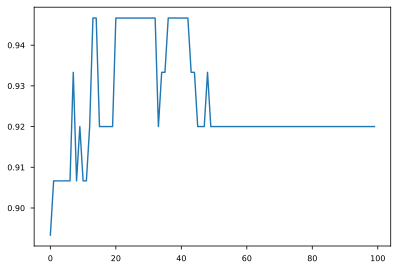

In [22]:
scores = [accuracy_score(test_y, pred) for pred in gbr.staged_predict(test_x)]
plt.plot(np.arange(len(scores)), scores)

In [23]:
proba = [p for p in gbr.staged_predict_proba(x)]
proba[0].shape

(75, 3)